Project_1.2.Rain Forecast with Keras_TensorFlow:
Australia Rains Classification (Will rain tomorrow in Australia?)

We're going to check if it will rain in Australia using only four features to build the model. Let's create functions for each step, call them all at the end, and run the model. These features can be changed or switched if they improve the model's performance.

Imports:

In [166]:
#Imports

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import visualkeras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
tf.__version__

'2.15.0'

Get data:

In [9]:
# Downloading data:
!curl https://raw.githubusercontent.com/alan-barzilay/NLPortugues/master/Semana%2002/data/weatherAUS.csv --output 'dataset/weatherAUS.csv'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13.5M  100 13.5M    0     0  8036k      0  0:00:01  0:00:01 --:--:-- 8034k


In [194]:
# Load data

def load_data(data_path='dataset/weatherAUS.csv')-> pd.DataFrame:

  raw_data = pd.read_csv(data_path)

  return raw_data

Pre-processing:

In [216]:
# Pre-processing function

def pre_processing(raw_data: pd.DataFrame) -> (pd.DataFrame, MinMaxScaler):

  # Drop null
  processed_data = raw_data.dropna()

  # Select features and target from dataset
  processed_data = processed_data[['Rainfall',
                                   'Humidity3pm',
                                   'Pressure9am',
                                   'RainToday',
                                   'RainTomorrow']]

  # Treating categoric data
  processed_data['RainToday'] = processed_data['RainToday'].replace({'Yes':1, 'No':0})

  processed_data['RainTomorrow'] = processed_data['RainTomorrow'].replace({'Yes':1, 'No':0})

  # features / target
  features = processed_data[['Rainfall',
                             'Humidity3pm',
                             'Pressure9am',
                             'RainToday']]

  target = processed_data['RainTomorrow']

  # Scaling features using MinMaxScaler
  scaler = MinMaxScaler()

  scaled_features = scaler.fit_transform(features)

  processed_data[['Rainfall',
                  'Humidity3pm',
                  'Pressure9am',
                  'RainToday']] = scaled_features

  # Get back target data
  processed_data['RainTomorrow'] = target

  print(processed_data.head())

  return processed_data, scaler

Exploring data:

In [173]:
# Function to generate graphs for the distribution of all features

def visualize_data(data):


  imb_pltt = ['#648FFF',
              '#785EF0',
              '#DC267F',
              '#FE6100',
              '#FFB000']

  # RainToday:
  sns.set()
  sns.set_palette(sns.color_palette([imb_pltt[2], imb_pltt[0]]))
  sns.countplot(x=data.RainToday)
  plt.xlabel('Rained today?')
  plt.ylabel('Count')
  plt.title("Values of 'RainToday' to all pre-processed data")
  plt.show()

  # RainTomorrow:
  sns.set()
  sns.set_palette(sns.color_palette([imb_pltt[3], imb_pltt[1]]))
  sns.countplot(x=data.RainTomorrow)
  plt.xlabel('Will rain tomorrow?')
  plt.ylabel('Count')
  plt.title("Values of 'RainTomorrow' to all pre-processed data")
  plt.show()

  # Humidity3pm:
  sns.set()
  sns.displot(data.Humidity3pm, color=imb_pltt[0], stat='density', kde=True)
  plt.xlabel('Humidity after 3pm')
  plt.ylabel('Normalized Density')
  plt.title("Distribution of Humidity3pm' feature to all pre-processed data")
  plt.show()

  # Pressure9am:
  sns.set
  sns.displot(data.Pressure9am, color=imb_pltt[4], stat='density', kde=True)
  plt.xlabel('Atmospheric pressure at 9am')
  plt.ylabel('Normalized Density')
  plt.title("Distribution of 'Pressure9am' feature to all pre-processed data")
  plt.show()

  # Rainfall:
  sns.set()
  sns.histplot(data.Rainfall, color=imb_pltt[1], bins=500, kde=True)
  plt.xlim(0,10)
  plt.xlabel('Pluviosity')
  plt.ylabel('Normalized Density')
  plt.title("Distribution of 'Rainfall' feature to all pre-processed data")
  plt.show()

  return

Split data

In [210]:
# Split data

def split_data(data: pd.DataFrame, val_size=0.2) -> tuple:

    x = data.drop(columns='RainTomorrow')

    y = data['RainTomorrow']

    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=val_size, random_state=42)

    # Convert to float32
    x_train = x_train.astype(np.float32)
    x_val = x_val.astype(np.float32)
    y_train = y_train.astype(np.float32)
    y_val = y_val.astype(np.float32)

    return x_train, x_val, y_train, y_val

Build a model:

In [176]:
# Model

def build_train_model(x_train, x_val, y_train, y_val):

  model = tf.keras.Sequential([
      keras.Input(shape=4,),
      keras.layers.Dense(units=12, activation='relu', name='Layer1_Relu'),
      keras.layers.Dense(units=4, activation='relu', name='Layer2_Relu'),
      keras.layers.Dense(units=1, activation='sigmoid', name = 'Output_Layer') # sigmoid function preferred for binary classification
                               ])
  # Summary
  model.summary()

  # Neural network graph
  visualkeras.layered_view(model, legend=True).show()

  # Compile and metrics
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  # Fit and evaluation
  model.fit(x_train, y_train, epochs=10)

  loss, accuracy = model.evaluate(x_val, y_val)
  print(f'Validation Loss:{loss}')
  print(f'Validation Accuracy: {accuracy}')

  return model

Call functions:

In [177]:
# Load data to use:

In [217]:
df = load_data()
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [158]:
# Distribution of chosen features

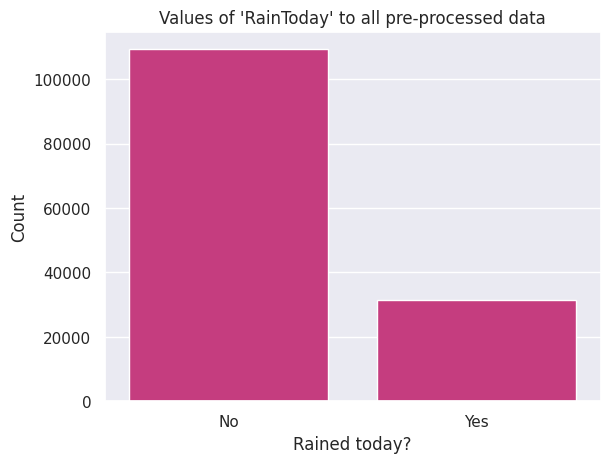

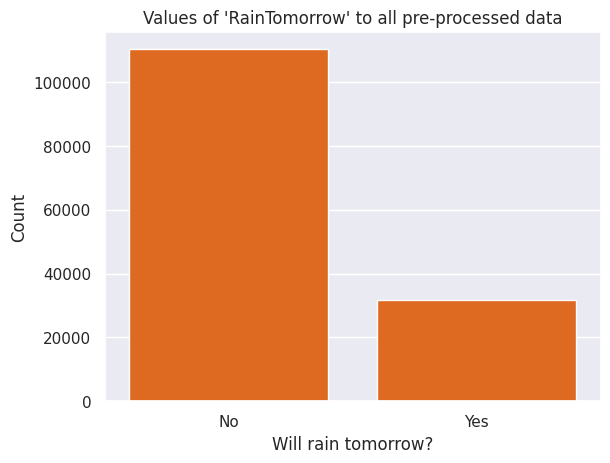

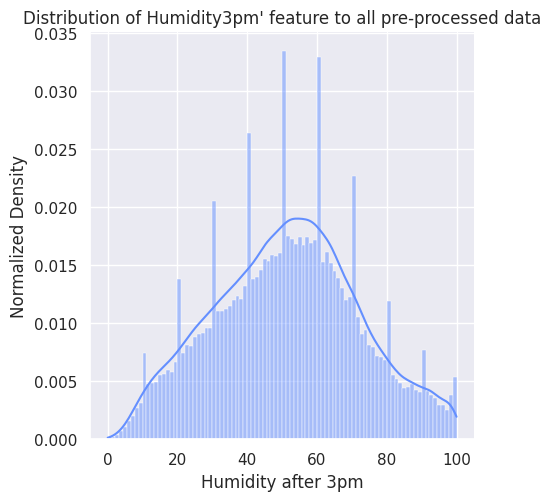

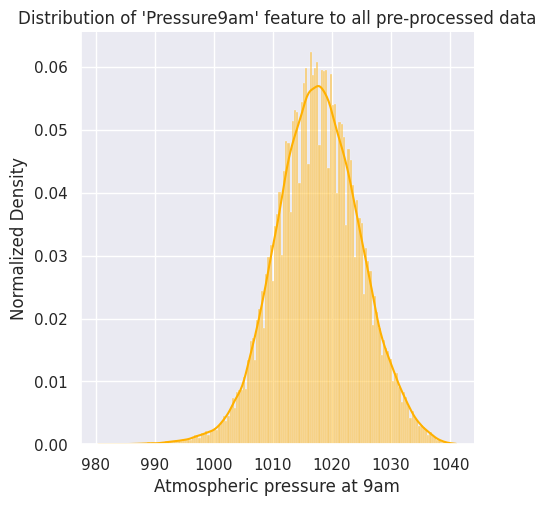

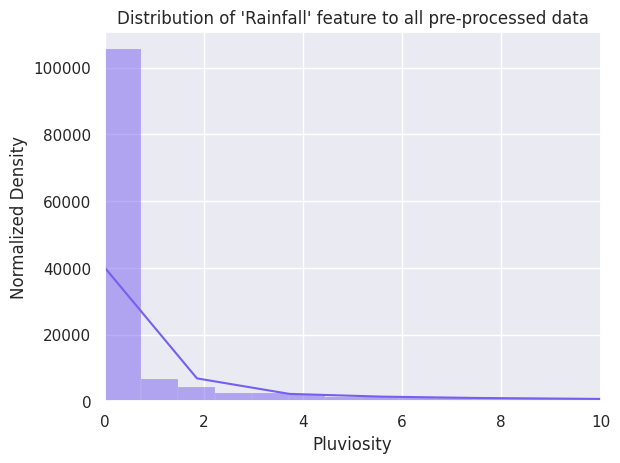

In [159]:
visualize_data(df)

In [218]:
# Data cleaning and transformation
df, scaler = pre_processing(df)
df

      Rainfall  Humidity3pm  Pressure9am  RainToday  RainTomorrow
5939       0.0         0.13     0.430718        0.0             0
5940       0.0         0.08     0.540902        0.0             0
5942       0.0         0.22     0.530885        0.0             0
5943       0.0         0.22     0.537563        0.0             0
5944       0.0         0.15     0.504174        0.0             0


,Rainfall,Humidity3pm,Pressure9am,RainToday,RainTomorrow
5939,0.0,0.13,0.430718,0.0,0
5940,0.0,0.08,0.540902,0.0,0
5942,0.0,0.22,0.530885,0.0,0
5943,0.0,0.22,0.537563,0.0,0
5944,0.0,0.15,0.504174,0.0,0
...,...,...,...,...,...
139108,0.0,0.32,0.557596,0.0,0
139109,0.0,0.28,0.569282,0.0,0
139110,0.0,0.23,0.580968,0.0,0
139111,0.0,0.58,0.574290,0.0,0


In [219]:
# Split
x_train, x_val, y_train, y_val = split_data(df)

In [220]:
# Modeling
model_final = build_train_model(x_train, x_val, y_train, y_val)


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer1_Relu (Dense)         (None, 12)                60        
                                                                 
 Layer2_Relu (Dense)         (None, 4)                 52        
                                                                 
 Output_Layer (Dense)        (None, 1)                 5         
                                                                 
Total params: 117 (468.00 Byte)
Trainable params: 117 (468.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1411/1411 [==============================] - 4s 2ms/step - loss: 0.4509 - accuracy: 0.7854
Epoch 2/10
1411/1411 [==============================] - 3s 2ms/step - loss: 0.3963 - accuracy: 0.8362
Epoch 3/10
1411/1411 [==============================] - 4s 3ms/step - loss:

In [222]:
# Predicting:

# New features
new_features = list(map(float, input("Enter Rainfall, Humidity3pm, Pressure9am, RainToday (separated by commas): ").split(',')))

# check if the input has the correct number of features
if len(new_features) != 4:
    raise ValueError("Please, insert exactly the following four values: Rainfall, Humidity3pm, Pressure9am, RainToday")

# Convert to array NumPy and scaling
new_features_scaled = scaler.transform([new_features])

# Predict
prediction = model_final.predict(new_features_scaled)

probability_of_rain = prediction[0][0]

threshold = 0.5

# Binary decision based on the threshold
if probability_of_rain >= threshold:
    rain_prediction = "It will rain tomorrow."
else:
    rain_prediction = "It will not rain tomorrow."

# Result
print(f"Input: Rainfall, Humidity3pm, Pressure9am, RainToday: {', '.join(map(str, df))}")
print(f"Predicted Probability: {probability_of_rain*100:.2f} %")
print(f"Prediction: {rain_prediction}")

Enter Rainfall, Humidity3pm, Pressure9am, RainToday (separated by commas): 1,30,1005,0
1/1 [==============================] - 0s 23ms/step
Input: Rainfall, Humidity3pm, Pressure9am, RainToday: Rainfall, Humidity3pm, Pressure9am, RainToday, RainTomorrow
Predicted Probability: 11.54 %
Prediction: It will not rain tomorrow.
